<a href="https://colab.research.google.com/github/TQT2203/AI-/blob/main/bai_tap_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install scikit-fuzzy


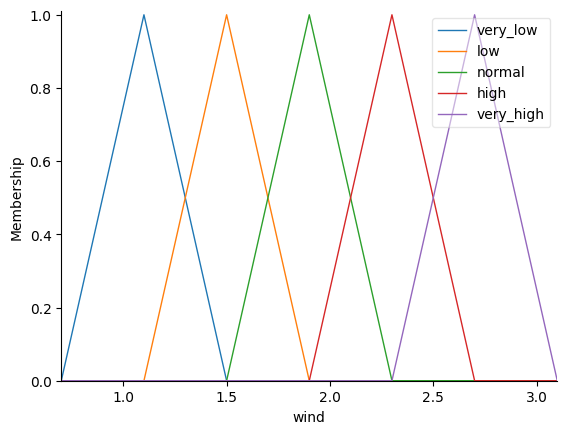

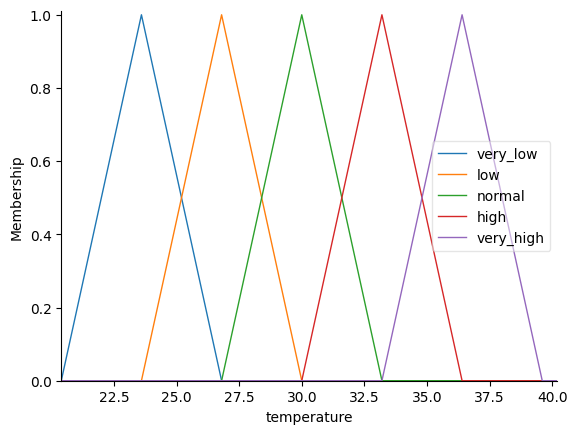

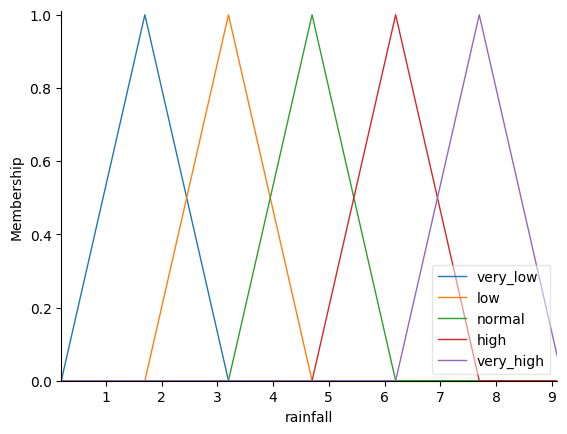

In [ ]:
# Bài 2.1
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind = ctrl.Antecedent(np.arange(0.7, 3.2, 0.1), 'wind')
temperature = ctrl.Antecedent(np.arange(20.4, 40.3, 0.1), 'temperature')
rainfall = ctrl.Consequent(np.arange(0.2, 9.2, 0.1), 'rainfall')

wind['very_low'] = fuzz.trimf(wind.universe, [0.7, 1.1, 1.5])
wind['low'] = fuzz.trimf(wind.universe, [1.1, 1.5, 1.9])
wind['normal'] = fuzz.trimf(wind.universe, [1.5, 1.9, 2.3])
wind['high'] = fuzz.trimf(wind.universe, [1.9, 2.3, 2.7])
wind['very_high'] = fuzz.trimf(wind.universe, [2.3, 2.7, 3.1])
temperature['very_low'] = fuzz.trimf(temperature.universe, [20.4, 23.6, 26.8])
temperature['low'] = fuzz.trimf(temperature.universe, [23.6, 26.8, 30])
temperature['normal'] = fuzz.trimf(temperature.universe, [26.8, 30, 33.2])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 33.2, 36.4])
temperature['very_high'] = fuzz.trimf(temperature.universe, [33.2, 36.4, 39.6])
rainfall['very_low'] = fuzz.trimf(rainfall.universe, [0.2, 1.7, 3.2])
rainfall['low'] = fuzz.trimf(rainfall.universe, [1.7, 3.2, 4.7])
rainfall['normal'] = fuzz.trimf(rainfall.universe, [3.2, 4.7, 6.2])
rainfall['high'] = fuzz.trimf(rainfall.universe, [4.7, 6.2, 7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe, [6.2, 7.7, 9.2])

wind.view()
temperature.view()
rainfall.view()

Nguy cơ tiểu đường: 78.28
Đánh giá: Nguy cơ cao (HR) → Cần xét nghiệm y tế thêm


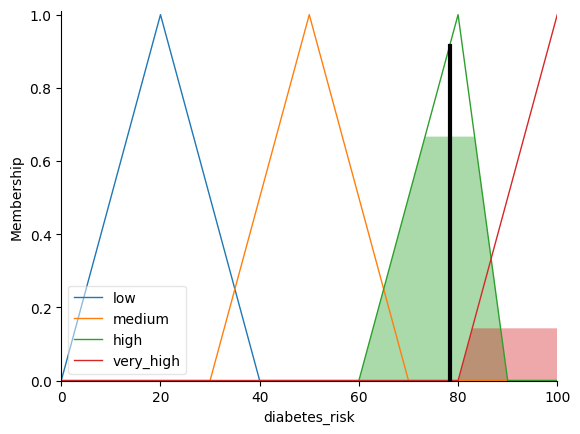

In [ ]:
# Bài 2.2
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Định nghĩa các biến đầu vào và đầu ra
blood_sugar = ctrl.Antecedent(np.arange(50, 251, 1), 'blood_sugar')
bmi = ctrl.Antecedent(np.arange(15, 41, 1), 'bmi')
urination = ctrl.Antecedent(np.arange(0, 11, 1), 'urination')
fatigue = ctrl.Antecedent(np.arange(0, 11, 1), 'fatigue')
diabetes_risk = ctrl.Consequent(np.arange(0, 101, 1), 'diabetes_risk')

# Định nghĩa các hàm thành viên dạng tam giác
blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [50, 80, 120])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [80, 120, 150])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [120, 200, 250])
blood_sugar['very_high'] = fuzz.trimf(blood_sugar.universe, [180, 250, 250])

bmi['underweight'] = fuzz.trimf(bmi.universe, [15, 18.5, 20])
bmi['normal'] = fuzz.trimf(bmi.universe, [18.5, 21.5, 25])
bmi['overweight'] = fuzz.trimf(bmi.universe, [24, 27, 30])
bmi['obese'] = fuzz.trimf(bmi.universe, [30, 40, 40])

urination['rarely'] = fuzz.trimf(urination.universe, [0, 2, 4])
urination['sometimes'] = fuzz.trimf(urination.universe, [3, 5, 7])
urination['often'] = fuzz.trimf(urination.universe, [6, 9, 10])

fatigue['low'] = fuzz.trimf(fatigue.universe, [0, 2, 4])
fatigue['moderate'] = fuzz.trimf(fatigue.universe, [3, 5, 7])
fatigue['high'] = fuzz.trimf(fatigue.universe, [6, 9, 10])

diabetes_risk['low'] = fuzz.trimf(diabetes_risk.universe, [0, 20, 40])
diabetes_risk['medium'] = fuzz.trimf(diabetes_risk.universe, [30, 50, 70])
diabetes_risk['high'] = fuzz.trimf(diabetes_risk.universe, [60, 80, 90])
diabetes_risk['very_high'] = fuzz.trimf(diabetes_risk.universe, [80, 100, 100])

# Xây dựng các quy tắc mờ
rules = [
    ctrl.Rule(blood_sugar['very_high'] & urination['often'], diabetes_risk['very_high']),
    ctrl.Rule(blood_sugar['very_high'] & urination['sometimes'], diabetes_risk['high']),
    ctrl.Rule(blood_sugar['high'] & urination['often'], diabetes_risk['high']),
    ctrl.Rule(blood_sugar['normal'] & urination['rarely'], diabetes_risk['low']),
    ctrl.Rule(blood_sugar['very_high'] & bmi['obese'], diabetes_risk['very_high']),
    ctrl.Rule(blood_sugar['very_high'] & bmi['overweight'], diabetes_risk['high']),
    ctrl.Rule(blood_sugar['high'] & bmi['overweight'], diabetes_risk['high']),
    ctrl.Rule(blood_sugar['high'] & bmi['normal'], diabetes_risk['medium']),
    ctrl.Rule(blood_sugar['normal'] & bmi['normal'], diabetes_risk['low']),
    ctrl.Rule(blood_sugar['very_high'] & fatigue['high'], diabetes_risk['very_high']),
    ctrl.Rule(blood_sugar['high'] & fatigue['high'], diabetes_risk['high']),
    ctrl.Rule(blood_sugar['high'] & fatigue['moderate'], diabetes_risk['medium']),
    ctrl.Rule(blood_sugar['normal'] & fatigue['low'], diabetes_risk['low'])
]

# Tạo hệ thống điều khiển và mô phỏng
diabetes_ctrl = ctrl.ControlSystem(rules)
diabetes_simulation = ctrl.ControlSystemSimulation(diabetes_ctrl)

# Gán giá trị đầu vào
diabetes_simulation.input['blood_sugar'] = 190  # Lượng đường trong máu
diabetes_simulation.input['bmi'] = 32          # BMI
diabetes_simulation.input['urination'] = 8     # Đi tiểu thường xuyên
diabetes_simulation.input['fatigue'] = 7       # Mức độ mệt mỏi

# Tính toán và hiển thị kết quả
diabetes_simulation.compute()
risk_score = diabetes_simulation.output['diabetes_risk']

# Xác định mức độ rủi ro dựa trên giá trị đầu ra
if risk_score <= 40:
    risk_level = "Nguy cơ thấp (LR) → Không đáng lo ngại ngay lập tức"
elif risk_score <= 70:
    risk_level = "Nguy cơ trung bình (MR) → Đề xuất thay đổi lối sống"
elif risk_score <= 90:
    risk_level = "Nguy cơ cao (HR) → Cần xét nghiệm y tế thêm"
else:
    risk_level = "Nguy cơ rất cao (VHR) → Cần chăm sóc y tế khẩn cấp"

# Hiển thị kết quả
print(f"Nguy cơ tiểu đường: {risk_score:.2f}")
print(f"Đánh giá: {risk_level}")

diabetes_risk.view(sim=diabetes_simulation)

Final Price Score: 8.04
Price Category: Very High


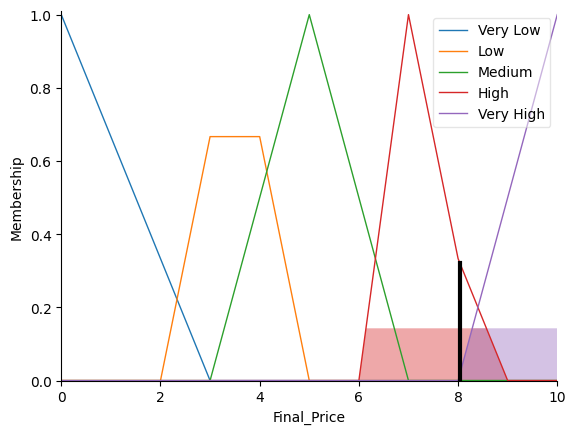

In [8]:
# Bài 2.3
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Định nghĩa các biến đầu vào
demand = ctrl.Antecedent(np.arange(0, 11, 1), 'Demand')
competitor_price = ctrl.Antecedent(np.arange(0, 11, 1), 'Competitor_Price')
production_cost = ctrl.Antecedent(np.arange(0, 11, 1), 'Production_Cost')
seasonality = ctrl.Antecedent(np.arange(0, 11, 1), 'Seasonality')
stock_level = ctrl.Antecedent(np.arange(0, 11, 1), 'Stock_Level')

# Định nghĩa tập mờ theo hàm tam giác
demand['Very Low'] = fuzz.trimf(demand.universe, [0, 0, 2])
demand['Low'] = fuzz.trimf(demand.universe, [1, 2.5, 4])
demand['Medium'] = fuzz.trimf(demand.universe, [3, 5, 7])
demand['High'] = fuzz.trimf(demand.universe, [6.5, 10, 10])

competitor_price['Very Low'] = fuzz.trimf(competitor_price.universe, [0, 0, 2])
competitor_price['Low'] = fuzz.trimf(competitor_price.universe, [2, 3, 4])
competitor_price['Medium'] = fuzz.trimf(competitor_price.universe, [3, 5, 7])
competitor_price['High'] = fuzz.trimf(competitor_price.universe, [6, 10, 10])

production_cost['Low'] = fuzz.trimf(production_cost.universe, [0, 0, 5])
production_cost['Medium'] = fuzz.trimf(production_cost.universe, [2, 5, 8])
production_cost['High'] = fuzz.trimf(production_cost.universe, [5, 10, 10])

seasonality['Off-Peak'] = fuzz.trimf(seasonality.universe, [0, 0, 5])
seasonality['Normal'] = fuzz.trimf(seasonality.universe, [2, 5, 8])
seasonality['Peak'] = fuzz.trimf(seasonality.universe, [5, 10, 10])

stock_level['Low'] = fuzz.trimf(stock_level.universe, [0, 0, 5])
stock_level['Medium'] = fuzz.trimf(stock_level.universe, [2, 4, 6])
stock_level['High'] = fuzz.trimf(stock_level.universe, [5, 6.5, 18])
stock_level['Very High'] = fuzz.trimf(stock_level.universe, [8, 10, 10])

# Định nghĩa biến đầu ra
final_price = ctrl.Consequent(np.arange(0, 11, 1), 'Final_Price')

# Định nghĩa tập mờ cho biến đầu ra
final_price['Very Low'] = fuzz.trimf(final_price.universe, [0, 0, 3])
final_price['Low'] = fuzz.trimf(final_price.universe, [2, 3, 4])
final_price['Medium'] = fuzz.trimf(final_price.universe, [3, 5, 7])
final_price['High'] = fuzz.trimf(final_price.universe, [6, 7, 8.5])
final_price['Very High'] = fuzz.trimf(final_price.universe, [8, 10, 10])

# Định nghĩa tập luật mờ
rule1 = ctrl.Rule(demand['High'] & competitor_price['High'] & stock_level['Low'], final_price['Very High'])
rule2 = ctrl.Rule(demand['High'] & seasonality['Peak'] & stock_level['Low'], final_price['Very High'])
rule3 = ctrl.Rule(demand['Medium'] & production_cost['High'] & stock_level['Low'], final_price['Very High'])

rule4 = ctrl.Rule(demand['High'] & competitor_price['Medium'] & stock_level['Medium'], final_price['High'])
rule5 = ctrl.Rule(demand['Medium'] & competitor_price['High'] & stock_level['Low'], final_price['High'])
rule6 = ctrl.Rule(demand['High'] & seasonality['Peak'] & stock_level['Medium'], final_price['High'] )

rule7 = ctrl.Rule(demand['Medium'] & competitor_price['Medium'] & stock_level['Medium'], final_price['Medium'])
rule8 = ctrl.Rule(demand['Low'] & competitor_price['High'] & stock_level['Medium'], final_price['Medium'])
rule9 = ctrl.Rule(demand['Medium'] & production_cost['Medium'] & stock_level['Medium'], final_price['Medium'])

rule10 = ctrl.Rule(demand['Low'] & competitor_price['Low'] & stock_level['High'], final_price['Low'])
rule11 = ctrl.Rule(demand['Medium'] & production_cost['Low'] & stock_level['High'], final_price['Low'])
rule12 = ctrl.Rule(demand['Low'] & seasonality['Off-Peak'] & stock_level['High'], final_price['Low'])

rule13 = ctrl.Rule(demand['Low'] & competitor_price['Low'] & stock_level['Very High'], final_price['Very Low'])
rule14 = ctrl.Rule(demand['Very Low'] & seasonality['Off-Peak'] & stock_level['Very High'], final_price['Very Low'])
rule15 = ctrl.Rule(demand['Medium'] & competitor_price['Very Low'] & stock_level['Very High'], final_price['Very Low'])

# 6. Tạo hệ thống điều khiển logic mờ
pricing_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15
])

pricing_simulation = ctrl.ControlSystemSimulation(pricing_ctrl)

# 7. Gán giá trị đầu vào và tính toán đầu ra
pricing_simulation.input['Demand'] = 7  # Cầu cao
pricing_simulation.input['Competitor_Price'] = 4  # Giá đối thủ trung bình
pricing_simulation.input['Production_Cost'] = 6  # Chi phí sản xuất cao
pricing_simulation.input['Seasonality'] = 8  # Mùa cao điểm
pricing_simulation.input['Stock_Level'] = 3  # Mức tồn kho thấp

pricing_simulation.compute()

# 8. Hiển thị kết quả
final_price_score = pricing_simulation.output['Final_Price']

# 9. Đánh giá mức giá dựa trên final_price_score
def classify_final_price(score):
    if score <= 2:
        return "Very Low"
    elif score <= 4:
        return "Low"
    elif score <= 6:
        return "Medium"
    elif score <= 8:
        return "High"
    else:
        return "Very High"

price_category = classify_final_price(final_price_score)

# 10. Xuất kết quả
print(f"Final Price Score: {final_price_score:.2f}")
print(f"Price Category: {price_category}")
final_price.view(sim=pricing_simulation)

Wash Time: 6.00
Water Level: 6.00
Wash Time: Medium
Water Level: Medium


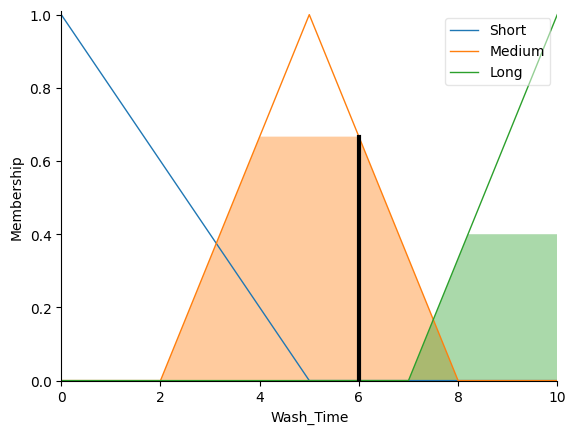

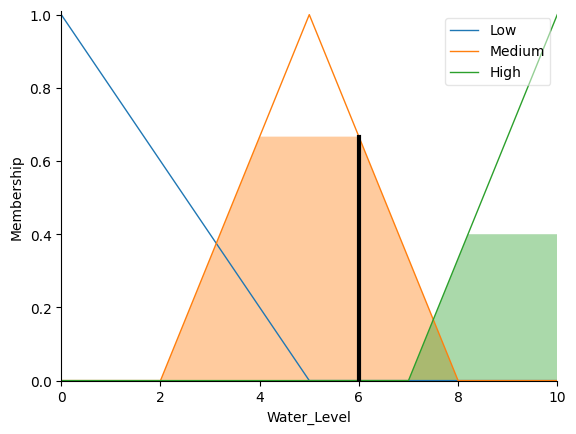

In [ ]:
# Bài 2.4
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Định nghĩa các biến đầu vào
load = ctrl.Antecedent(np.arange(0, 11, 1), 'Load')  # Khối lượng quần áo
dirt_level = ctrl.Antecedent(np.arange(0, 11, 1), 'Dirt_Level')  # Mức độ bẩn
fabric_type = ctrl.Antecedent(np.arange(0, 11, 1), 'Fabric_Type')  # Loại vải

# Định nghĩa các biến đầu ra
wash_time = ctrl.Consequent(np.arange(0, 11, 1), 'Wash_Time')  # Thời gian giặt
water_level = ctrl.Consequent(np.arange(0, 11, 1), 'Water_Level')  # Mức nước

# Định nghĩa tập mờ cho các biến đầu vào
load['Small'] = fuzz.trimf(load.universe, [0, 0, 5])
load['Medium'] = fuzz.trimf(load.universe, [2, 5, 8])
load['Large'] = fuzz.trimf(load.universe, [5, 10, 10])

dirt_level['Low'] = fuzz.trimf(dirt_level.universe, [0, 0, 5])
dirt_level['Medium'] = fuzz.trimf(dirt_level.universe, [2, 5, 8])
dirt_level['High'] = fuzz.trimf(dirt_level.universe, [5, 10, 10])

fabric_type['Delicate'] = fuzz.trimf(fabric_type.universe, [0, 0, 5])
fabric_type['Normal'] = fuzz.trimf(fabric_type.universe, [2, 5, 8])
fabric_type['Heavy'] = fuzz.trimf(fabric_type.universe, [5, 10, 10])

# Định nghĩa tập mờ cho biến đầu ra
wash_time['Short'] = fuzz.trimf(wash_time.universe, [0, 0, 5])
wash_time['Medium'] = fuzz.trimf(wash_time.universe, [2, 5, 8])
wash_time['Long'] = fuzz.trimf(wash_time.universe, [7, 10, 10])

water_level['Low'] = fuzz.trimf(water_level.universe, [0, 0, 5])
water_level['Medium'] = fuzz.trimf(water_level.universe, [2, 5, 8])
water_level['High'] = fuzz.trimf(water_level.universe, [7, 10, 10])

# Định nghĩa các luật mờ
rule1 = ctrl.Rule(load['Small'] & dirt_level['Low'], (wash_time['Short'], water_level['Low']))
rule2 = ctrl.Rule(load['Small'] & dirt_level['Medium'], (wash_time['Medium'], water_level['Medium']))
rule3 = ctrl.Rule(load['Small'] & dirt_level['High'], (wash_time['Long'], water_level['Medium']))

rule4 = ctrl.Rule(load['Medium'] & dirt_level['Low'], (wash_time['Medium'], water_level['Medium']))
rule5 = ctrl.Rule(load['Medium'] & dirt_level['Medium'], (wash_time['Long'], water_level['Medium']))
rule6 = ctrl.Rule(load['Medium'] & dirt_level['High'], (wash_time['Long'], water_level['High']))

rule7 = ctrl.Rule(load['Large'] & dirt_level['Low'], (wash_time['Medium'], water_level['High']))
rule8 = ctrl.Rule(load['Large'] & dirt_level['Medium'], (wash_time['Long'], water_level['High']))
rule9 = ctrl.Rule(load['Large'] & dirt_level['High'], (wash_time['Long'], water_level['High']))

rule10 = ctrl.Rule(fabric_type['Delicate'], (wash_time['Short'], water_level['Low']))
rule11 = ctrl.Rule(fabric_type['Normal'], (wash_time['Medium'], water_level['Medium']))
rule12 = ctrl.Rule(fabric_type['Heavy'], (wash_time['Long'], water_level['High']))

rule13 = ctrl.Rule(load['Large'] & dirt_level['High'] & fabric_type['Heavy'], (wash_time['Long'], water_level['High']))
rule14 = ctrl.Rule(load['Small'] & dirt_level['Low'] & fabric_type['Delicate'], (wash_time['Short'], water_level['Low']))
rule15 = ctrl.Rule(load['Medium'] & dirt_level['Medium'] & fabric_type['Normal'], (wash_time['Medium'], water_level['Medium']))

# Tạo hệ thống điều khiển logic mờ
washing_machine_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
washing_simulation = ctrl.ControlSystemSimulation(washing_machine_ctrl)

# Gán giá trị đầu vào và tính toán đầu ra
washing_simulation.input['Load'] = 7  # Kích thước tải trung bình
washing_simulation.input['Dirt_Level'] = 5  # Mức độ bẩn trung bình
washing_simulation.input['Fabric_Type'] = 6  # Vải bình thường

washing_simulation.compute()

# Hiển thị kết quả
wash_time_result = washing_simulation.output['Wash_Time']
water_level_result = washing_simulation.output['Water_Level']

print(f"Wash Time: {wash_time_result:.2f}")
print(f"Water Level: {water_level_result:.2f}")

# Đánh giá kết quả theo 3 mức: Short, Medium, Long
if wash_time_result <= 3:
    print("Wash Time: Short")
elif 3 < wash_time_result <= 7:
    print("Wash Time: Medium")
else:
    print("Wash Time: Long")

# Đánh giá mức nước theo 3 mức: Low, Medium, High
if water_level_result <= 3:
    print("Water Level: Low")
elif 3 < water_level_result <= 7:
    print("Water Level: Medium")
else:
    print("Water Level: High")

wash_time.view(sim=washing_simulation)
water_level.view(sim=washing_simulation)

Fan Speed Output: 80.56
Cooling Level Output: 80.56
Final Fan Speed: High
Final Cooling Level: High


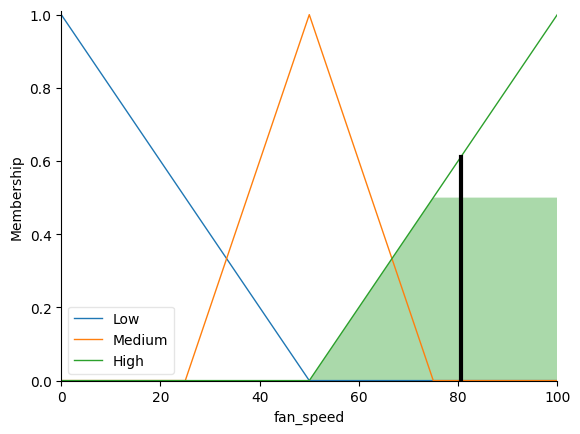

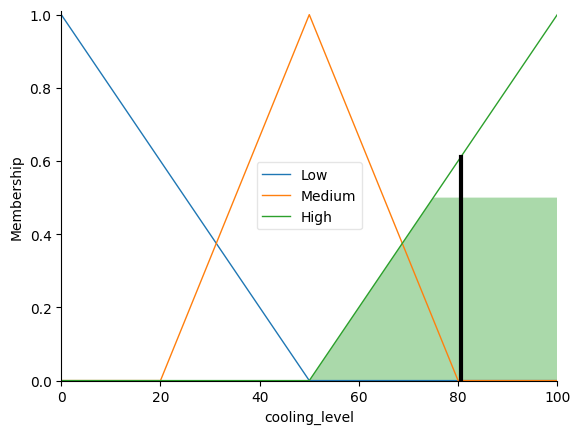

In [ ]:
# Bài 2.5
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Định nghĩa các biến đầu vào
temperature = ctrl.Antecedent(np.arange(16, 36, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')
people = ctrl.Antecedent(np.arange(1, 11, 1), 'people')

# Định nghĩa các biến đầu ra
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')
cooling_level = ctrl.Consequent(np.arange(0, 101, 1), 'cooling_level')

# Định nghĩa tập mờ cho các biến đầu vào
temperature['Cold'] = fuzz.trimf(temperature.universe, [16, 16, 22])
temperature['Cool'] = fuzz.trimf(temperature.universe, [18, 22, 26])
temperature['Comfortable'] = fuzz.trimf(temperature.universe, [22, 25, 28])
temperature['Warm'] = fuzz.trimf(temperature.universe, [26, 30, 34])
temperature['Hot'] = fuzz.trimf(temperature.universe, [30, 35, 35])

humidity['Low'] = fuzz.trimf(humidity.universe, [20, 20, 50])
humidity['Medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['High'] = fuzz.trimf(humidity.universe, [60, 100, 100])

people['Few'] = fuzz.trimf(people.universe, [1, 1, 4])
people['Moderate'] = fuzz.trimf(people.universe, [2, 5, 8])
people['Many'] = fuzz.trimf(people.universe, [6, 10, 10])

# Định nghĩa tập mờ cho các biến đầu ra
fan_speed['Low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['Medium'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['High'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

cooling_level['Low'] = fuzz.trimf(cooling_level.universe, [0, 0, 50])
cooling_level['Medium'] = fuzz.trimf(cooling_level.universe, [20, 50, 80])
cooling_level['High'] = fuzz.trimf(cooling_level.universe, [50, 100, 100])

# Định nghĩa tập luật mờ
rule1 = ctrl.Rule(temperature['Cold'], fan_speed['Low'])
rule2 = ctrl.Rule(temperature['Cool'], fan_speed['Low'])
rule3 = ctrl.Rule(temperature['Comfortable'], fan_speed['Medium'])
rule4 = ctrl.Rule(temperature['Warm'], fan_speed['High'])
rule5 = ctrl.Rule(temperature['Hot'], fan_speed['High'])

rule6 = ctrl.Rule(temperature['Cold'], cooling_level['Low'])
rule7 = ctrl.Rule(temperature['Cool'], cooling_level['Low'])
rule8 = ctrl.Rule(temperature['Comfortable'], cooling_level['Medium'])
rule9 = ctrl.Rule(temperature['Warm'], cooling_level['High'])
rule10 = ctrl.Rule(temperature['Hot'], cooling_level['High'])

rule11 = ctrl.Rule(humidity['Low'], cooling_level['Low'])
rule12 = ctrl.Rule(humidity['Medium'], cooling_level['Medium'])
rule13 = ctrl.Rule(humidity['High'], cooling_level['High'])

rule14 = ctrl.Rule(people['Few'], fan_speed['Low'])
rule15 = ctrl.Rule(people['Moderate'], fan_speed['Medium'])
rule16 = ctrl.Rule(people['Many'], fan_speed['High'])

rule17 = ctrl.Rule(temperature['Hot'] & humidity['High'] & people['Many'], cooling_level['High'], fan_speed['High'])
rule18 = ctrl.Rule(temperature['Comfortable'] & humidity['Medium'] & people['Moderate'], cooling_level['Medium'], fan_speed['Medium'])
rule19 = ctrl.Rule(temperature['Cool'] & humidity['Low'] & people['Few'], cooling_level['Low'], fan_speed['Low'])

# 6. Tạo hệ thống điều khiển logic mờ
ac_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19])
ac_simulation = ctrl.ControlSystemSimulation(ac_control)

# 7. Gán giá trị đầu vào và tính toán đầu ra
ac_simulation.input['temperature'] = 28  # Nhiệt độ bình thường
ac_simulation.input['humidity'] = 80    # Độ ẩm cao
ac_simulation.input['people'] = 8       # Số người nhiều

ac_simulation.compute()

# 8. Hiển thị kết quả
final_fan_speed = ac_simulation.output['fan_speed']
final_cooling_level = ac_simulation.output['cooling_level']

print(f"Fan Speed Output: {final_fan_speed:.2f}")
print(f"Cooling Level Output: {final_cooling_level:.2f}")

# Đánh giá mức độ theo 3 mức: Thấp, Trung bình, Cao
def evaluate_output(value):
    if value < 33:
        return "Low"
    elif value < 67:
        return "Medium"
    else:
        return "High"

print(f"Final Fan Speed: {evaluate_output(final_fan_speed)}")
print(f"Final Cooling Level: {evaluate_output(final_cooling_level)}")

fan_speed.view(sim=ac_simulation)
cooling_level.view(sim=ac_simulation)

Thời gian nấu: 17.35 phút (Thời gian nấu trung bình)
Mức công suất: 60.00% (Công suất cao)


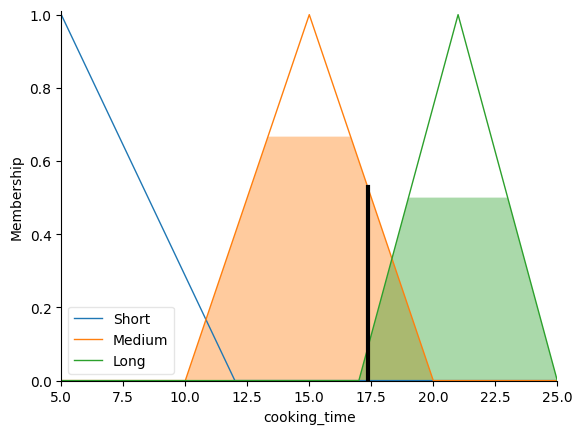

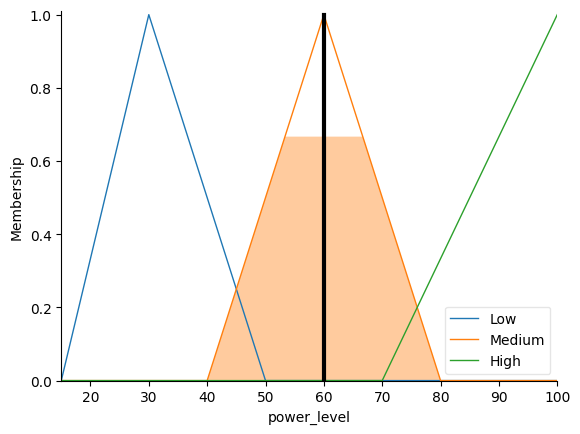

In [ ]:
# Bài 2.6
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Định nghĩa các biến đầu vào
weight = ctrl.Antecedent(np.arange(100, 1100, 100), 'weight')
food_type = ctrl.Antecedent(np.arange(0, 11, 1), 'food_type')
temperature = ctrl.Antecedent(np.arange(0, 61, 1), 'temperature')

# Định nghĩa các biến đầu ra
cooking_time = ctrl.Consequent(np.arange(5, 26, 1), 'cooking_time')
power_level = ctrl.Consequent(np.arange(15, 101, 1), 'power_level')

# Định nghĩa tập mờ
weight['Light'] = fuzz.trimf(weight.universe, [100, 100, 500])
weight['Medium'] = fuzz.trimf(weight.universe, [300, 600, 900])
weight['Heavy'] = fuzz.trimf(weight.universe, [700, 1000, 1000])

food_type['Soft'] = fuzz.trimf(food_type.universe, [0, 0, 4])
food_type['Medium'] = fuzz.trimf(food_type.universe, [2, 5, 8])
food_type['Hard'] = fuzz.trimf(food_type.universe, [6, 10, 10])

temperature['Cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['Warm'] = fuzz.trimf(temperature.universe, [10, 30, 50])
temperature['Hot'] = fuzz.trimf(temperature.universe, [40, 60, 60])

cooking_time['Short'] = fuzz.trimf(cooking_time.universe, [5, 5, 12])
cooking_time['Medium'] = fuzz.trimf(cooking_time.universe, [10, 15, 20])
cooking_time['Long'] = fuzz.trimf(cooking_time.universe, [17, 21, 25])

power_level['Low'] = fuzz.trimf(power_level.universe, [15, 30, 50 ])
power_level['Medium'] = fuzz.trimf(power_level.universe, [40, 60, 80])
power_level['High'] = fuzz.trimf(power_level.universe, [70, 100, 100])

# Định nghĩa luật mờ
rules = [
    ctrl.Rule(weight['Light'], cooking_time['Short']),
    ctrl.Rule(weight['Medium'], cooking_time['Medium']),
    ctrl.Rule(weight['Heavy'], cooking_time['Long']),

    ctrl.Rule(food_type['Soft'], power_level['Low']),
    ctrl.Rule(food_type['Medium'], power_level['Medium']),
    ctrl.Rule(food_type['Hard'], power_level['High']),

    ctrl.Rule(temperature['Cold'], cooking_time['Long']),
    ctrl.Rule(temperature['Warm'], cooking_time['Medium']),
    ctrl.Rule(temperature['Hot'], cooking_time['Short']),

    ctrl.Rule(weight['Heavy'] & food_type['Hard'] & temperature['Cold'],
              (cooking_time['Long'], power_level['High'])),

    ctrl.Rule(weight['Medium'] & food_type['Soft'] & temperature['Warm'],
              (cooking_time['Medium'], power_level['Low'])),

    ctrl.Rule(weight['Light'] & food_type['Medium'] & temperature['Hot'],
              (cooking_time['Short'], power_level['Medium']))
]

# Tạo hệ thống điều khiển logic mờ
microwave_ctrl = ctrl.ControlSystem(rules)
microwave_simulation = ctrl.ControlSystemSimulation(microwave_ctrl)

# Gán giá trị đầu vào và tính toán đầu ra
microwave_simulation.input['weight'] = 700  # Trọng lượng 700g
microwave_simulation.input['food_type'] = 6  # Loại thực phẩm trung bình
microwave_simulation.input['temperature'] = 10  # Nhiệt độ ban đầu lạnh (10°C)

microwave_simulation.compute()

# Lấy giá trị đầu ra
cooking_time_result = microwave_simulation.output['cooking_time']
power_level_result = microwave_simulation.output['power_level']

# Đánh giá thời gian nấu
if cooking_time_result <= 12:
    cooking_time_label = "Thời gian nấu ngắn"
elif cooking_time_result <= 20:
    cooking_time_label = "Thời gian nấu trung bình"
else:
    cooking_time_label = "Thời gian nấu dài"

# Đánh giá mức công suất
if power_level_result <= 30:
    power_level_label = "Công suất thấp"
elif power_level_result <= 60:
    power_level_label = "Công suất trung bình"
else:
    power_level_label = "Công suất cao"

# Hiển thị kết quả
print(f"Thời gian nấu: {cooking_time_result:.2f} phút ({cooking_time_label})")
print(f"Mức công suất: {power_level_result:.2f}% ({power_level_label})")

cooking_time.view(sim=microwave_simulation)
power_level.view(sim=microwave_simulation)

Thời gian nấu: 31.75 phút → Medium (Trung bình)
Mức nhiệt: 68.13% công suất → Medium (Trung bình)


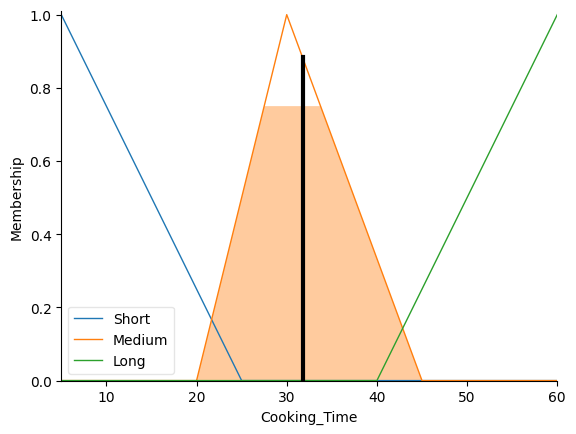

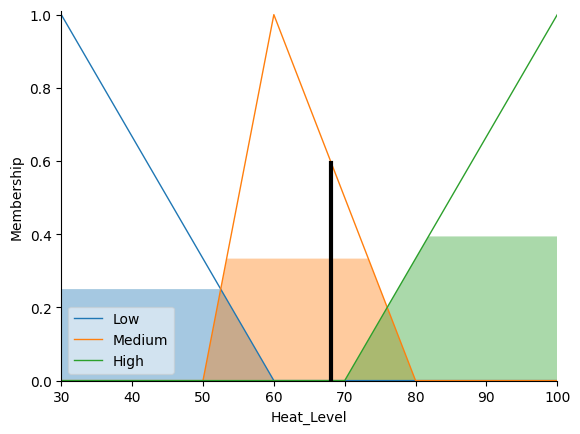

In [ ]:
# Bài 2.7
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Định nghĩa các biến đầu vào
food_type = ctrl.Antecedent(np.arange(0, 101, 1), 'Food_Type')
food_weight = ctrl.Antecedent(np.arange(100, 1001, 1), 'Food_Weight')
initial_temp = ctrl.Antecedent(np.arange(0, 61, 1), 'Initial_Temp')
water_content = ctrl.Antecedent(np.arange(0, 101, 1), 'Water_Content')

# Định nghĩa các biến đầu ra
cooking_time = ctrl.Consequent(np.arange(5, 61, 1), 'Cooking_Time')
heat_level = ctrl.Consequent(np.arange(30, 101, 1), 'Heat_Level')

# Xác định tập mờ cho từng biến
food_type['Soft'] = fuzz.trimf(food_type.universe, [0, 0, 33])
food_type['Medium'] = fuzz.trimf(food_type.universe, [25, 50, 75])
food_type['Hard'] = fuzz.trimf(food_type.universe, [67, 100, 100])

food_weight['Light'] = fuzz.trimf(food_weight.universe, [100, 100, 500])
food_weight['Medium'] = fuzz.trimf(food_weight.universe, [300, 500, 700])
food_weight['Heavy'] = fuzz.trimf(food_weight.universe, [600, 1000, 1000])

initial_temp['Cold'] = fuzz.trimf(initial_temp.universe, [0, 0, 20])
initial_temp['Warm'] = fuzz.trimf(initial_temp.universe, [10, 30, 50])
initial_temp['Hot'] = fuzz.trimf(initial_temp.universe, [40, 60, 60])

water_content['Low'] = fuzz.trimf(water_content.universe, [0, 0, 50])
water_content['Medium'] = fuzz.trimf(water_content.universe, [30, 50, 80])
water_content['High'] = fuzz.trimf(water_content.universe, [60, 100, 100])

cooking_time['Short'] = fuzz.trimf(cooking_time.universe, [5, 5, 25])
cooking_time['Medium'] = fuzz.trimf(cooking_time.universe, [20, 30, 45])
cooking_time['Long'] = fuzz.trimf(cooking_time.universe, [40, 60, 60])

heat_level['Low'] = fuzz.trimf(heat_level.universe, [30, 30, 60])
heat_level['Medium'] = fuzz.trimf(heat_level.universe, [50, 60, 80])
heat_level['High'] = fuzz.trimf(heat_level.universe, [70, 100, 100])

# Định nghĩa luật mờ
rule1 = ctrl.Rule(food_weight['Light'], cooking_time['Short'])
rule2 = ctrl.Rule(food_weight['Medium'], cooking_time['Medium'])
rule3 = ctrl.Rule(food_weight['Heavy'], cooking_time['Long'])

rule4 = ctrl.Rule(food_type['Soft'], heat_level['Low'])
rule5 = ctrl.Rule(food_type['Medium'], heat_level['Medium'])
rule6 = ctrl.Rule(food_type['Hard'], heat_level['High'])

rule7 = ctrl.Rule(initial_temp['Cold'], cooking_time['Long'])
rule8 = ctrl.Rule(initial_temp['Warm'], cooking_time['Medium'])
rule9 = ctrl.Rule(initial_temp['Hot'], cooking_time['Short'])

rule10 = ctrl.Rule(water_content['Low'], heat_level['High'])
rule11 = ctrl.Rule(water_content['Medium'], heat_level['Medium'])
rule12 = ctrl.Rule(water_content['High'], heat_level['Low'])

# Luật kết hợp
rule13 = ctrl.Rule(food_weight['Heavy'] & food_type['Hard'] & initial_temp['Cold'],
                   (cooking_time['Long'], heat_level['High']))
rule14 = ctrl.Rule(food_weight['Medium'] & food_type['Soft'] & initial_temp['Warm'],
                   (cooking_time['Medium'], heat_level['Low']))
rule15 = ctrl.Rule(food_weight['Light'] & food_type['Medium'] & initial_temp['Hot'],
                   (cooking_time['Short'], heat_level['Medium']))

# Tạo hệ thống điều khiển
cooking_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
    rule10, rule11, rule12, rule13, rule14, rule15
])
cooking_simulation = ctrl.ControlSystemSimulation(cooking_ctrl)

# Gán giá trị đầu vào
cooking_simulation.input['Food_Type'] = 80
cooking_simulation.input['Food_Weight'] = 600
cooking_simulation.input['Initial_Temp'] = 25
cooking_simulation.input['Water_Content'] = 70

# Tính toán đầu ra
cooking_simulation.compute()

# Lấy kết quả
cooking_time_value = cooking_simulation.output['Cooking_Time']
heat_level_value = cooking_simulation.output['Heat_Level']

# Xác định mức độ
def describe_cooking_time(value):
    if value < 20:
        return "Short (Ngắn)"
    elif value < 40:
        return "Medium (Trung bình)"
    else:
        return "Long (Dài)"

def describe_heat_level(value):
    if value < 50:
        return "Low (Thấp)"
    elif value < 70:
        return "Medium (Trung bình)"
    else:
        return "High (Cao)"

# Hiển thị kết quả
print(f"Thời gian nấu: {cooking_time_value:.2f} phút → {describe_cooking_time(cooking_time_value)}")
print(f"Mức nhiệt: {heat_level_value:.2f}% công suất → {describe_heat_level(heat_level_value)}")

cooking_time.view(sim=cooking_simulation)
heat_level.view(sim=cooking_simulation)

Drug Dose Adjustment: Duy trì (Maintain)
IV Fluid Adjustment: Tăng (Increase)
Oxygen Therapy Adjustment: Tăng (Increase)


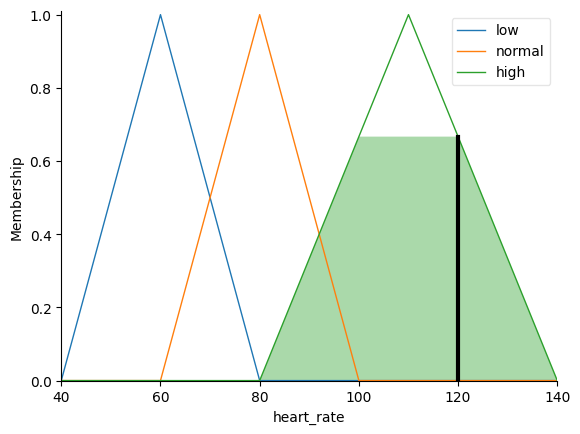

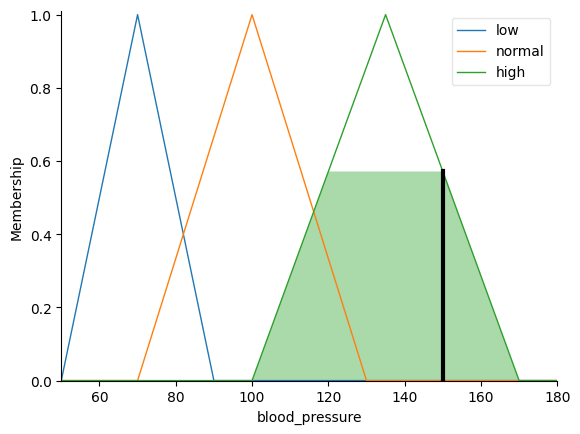

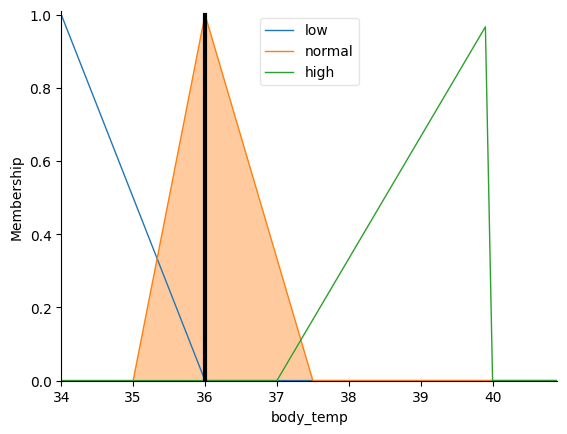

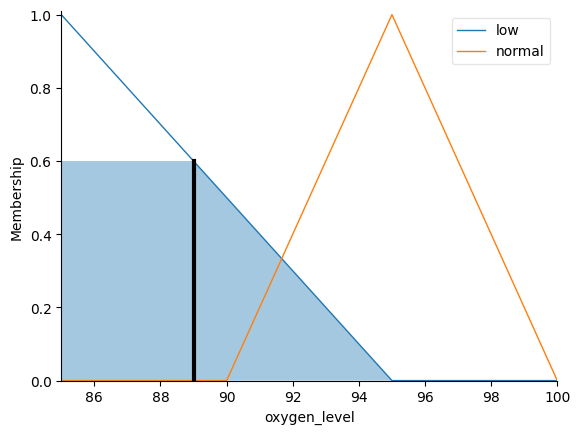

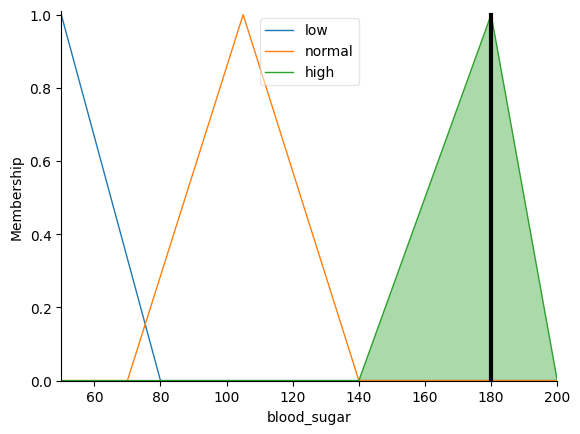

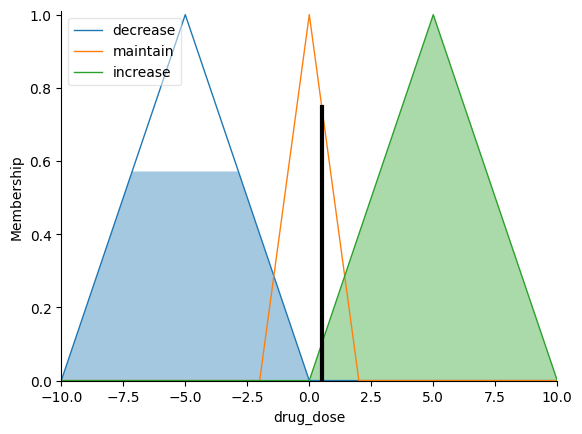

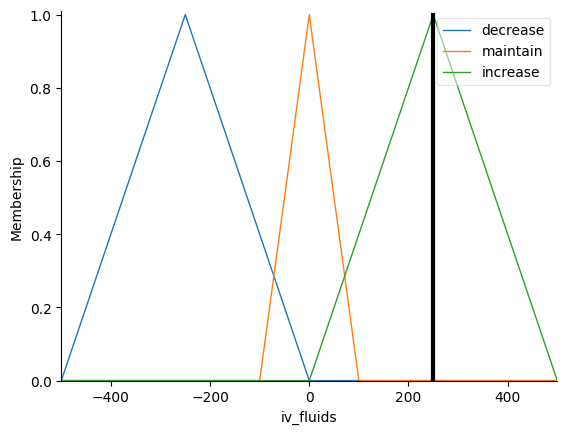

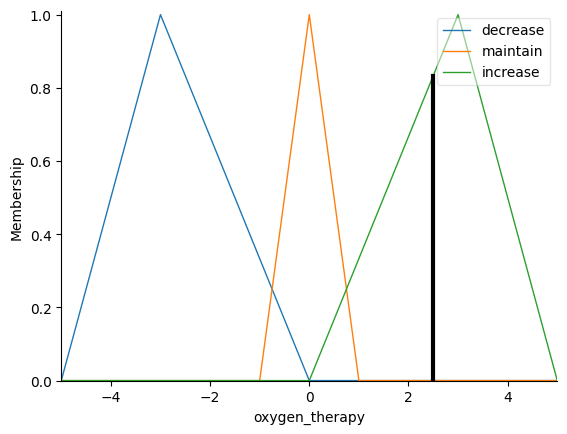

In [ ]:
# Bài 2.8
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Khai báo biến đầu vào
heart_rate = ctrl.Antecedent(np.arange(40, 141, 1), 'heart_rate')  # Nhịp tim (BPM)
blood_pressure = ctrl.Antecedent(np.arange(50, 181, 1), 'blood_pressure')  # Huyết áp (mmHg)
body_temp = ctrl.Antecedent(np.arange(34, 41, 0.1), 'body_temp')  # Nhiệt độ cơ thể (°C)
oxygen_level = ctrl.Antecedent(np.arange(85, 101, 1), 'oxygen_level')  # Độ bão hòa oxy (%)
blood_sugar = ctrl.Antecedent(np.arange(50, 201, 1), 'blood_sugar')  # Đường huyết (mg/dL)

# Khai báo biến đầu ra
drug_dose = ctrl.Consequent(np.arange(-10, 11, 1), 'drug_dose')  # Điều chỉnh liều thuốc (mg/IU)
iv_fluids = ctrl.Consequent(np.arange(-500, 501, 50), 'iv_fluids')  # Điều chỉnh dịch truyền (ml/giờ)
oxygen_therapy = ctrl.Consequent(np.arange(-5, 6, 1), 'oxygen_therapy')  # Điều chỉnh oxy (L/phút)

# Định nghĩa hàm thành viên cho biến đầu vào
heart_rate['low'] = fuzz.trimf(heart_rate.universe, [40, 60, 80])
heart_rate['normal'] = fuzz.trimf(heart_rate.universe, [60, 80, 100])
heart_rate['high'] = fuzz.trimf(heart_rate.universe, [80, 110, 140])

blood_pressure['low'] = fuzz.trimf(blood_pressure.universe, [50, 70, 90])
blood_pressure['normal'] = fuzz.trimf(blood_pressure.universe, [70, 100, 130])
blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [100, 135, 170])

body_temp['low'] = fuzz.trimf(body_temp.universe, [34, 34, 36])
body_temp['normal'] = fuzz.trimf(body_temp.universe, [35, 36, 37.5])
body_temp['high'] = fuzz.trimf(body_temp.universe, [37, 40, 40])

oxygen_level['low'] = fuzz.trimf(oxygen_level.universe, [85, 85, 95])
oxygen_level['normal'] = fuzz.trimf(oxygen_level.universe, [90, 95, 100])

blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [50, 50, 80])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [70, 105, 140])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [140, 180, 200])

# Định nghĩa hàm thành viên cho biến đầu ra
drug_dose['decrease'] = fuzz.trimf(drug_dose.universe, [-10, -5, 0])
drug_dose['maintain'] = fuzz.trimf(drug_dose.universe, [-2, 0, 2])
drug_dose['increase'] = fuzz.trimf(drug_dose.universe, [0, 5, 10])

iv_fluids['decrease'] = fuzz.trimf(iv_fluids.universe, [-500, -250, 0])
iv_fluids['maintain'] = fuzz.trimf(iv_fluids.universe, [-100, 0, 100])
iv_fluids['increase'] = fuzz.trimf(iv_fluids.universe, [0, 250, 500])

oxygen_therapy['decrease'] = fuzz.trimf(oxygen_therapy.universe, [-5, -3, 0])
oxygen_therapy['maintain'] = fuzz.trimf(oxygen_therapy.universe, [-1, 0, 1])
oxygen_therapy['increase'] = fuzz.trimf(oxygen_therapy.universe, [0, 3, 5])

# Định nghĩa các luật mờ
rules = [
    # Luật dựa trên nhịp tim và huyết áp
    ctrl.Rule(heart_rate['low'] & blood_pressure['low'], (iv_fluids['increase'], drug_dose['increase'])),
    ctrl.Rule(heart_rate['high'] & blood_pressure['high'], drug_dose['decrease']),
    ctrl.Rule(heart_rate['normal'] & blood_pressure['normal'], (drug_dose['maintain'], iv_fluids['maintain'])),

    # Luật dựa trên nhiệt độ và mức oxy
    ctrl.Rule(body_temp['high'] & oxygen_level['low'], (oxygen_therapy['increase'], drug_dose['increase'])),
    ctrl.Rule(body_temp['low'] & oxygen_level['low'], (oxygen_therapy['increase'], iv_fluids['increase'])),
    ctrl.Rule(body_temp['normal'] & oxygen_level['normal'], (oxygen_therapy['maintain'], drug_dose['maintain'])),

    # Luật dựa trên mức đường huyết
    ctrl.Rule(blood_sugar['high'], drug_dose['increase']),
    ctrl.Rule(blood_sugar['low'], drug_dose['decrease']),
    ctrl.Rule(blood_sugar['normal'], drug_dose['maintain']),

    # Luật kết hợp nhiều yếu tố
    ctrl.Rule(blood_pressure['high'] & blood_sugar['high'] & heart_rate['high'], drug_dose['decrease']),
    ctrl.Rule(blood_pressure['low'] & oxygen_level['low'] & heart_rate['low'], (iv_fluids['increase'], oxygen_therapy['increase'])),
    ctrl.Rule(body_temp['high'] & blood_pressure['high'] & oxygen_level['normal'], (drug_dose['increase'], oxygen_therapy['maintain'])),
]

# Tạo hệ thống điều khiển
patient_ctrl = ctrl.ControlSystem(rules)
patient_sim = ctrl.ControlSystemSimulation(patient_ctrl)

# Nhập giá trị đầu vào (Test)
patient_sim.input['heart_rate'] = 120
patient_sim.input['blood_pressure'] = 150
patient_sim.input['body_temp'] = 36
patient_sim.input['oxygen_level'] = 89
patient_sim.input['blood_sugar'] = 180

# Tính toán đầu ra
patient_sim.compute()

# Hàm chuyển đổi giá trị số thành nhãn
def interpret_result(value, var_name):
    if var_name == 'drug_dose':
        if value < -2: return "Giảm (Decrease)"
        elif value > 2: return "Tăng (Increase)"
        else: return "Duy trì (Maintain)"

    elif var_name == 'iv_fluids':
        if value < -100: return "Giảm (Decrease)"
        elif value > 100: return "Tăng (Increase)"
        else: return "Duy trì (Maintain)"

    elif var_name == 'oxygen_therapy':
        if value < -1: return "Giảm (Decrease)"
        elif value > 1: return "Tăng (Increase)"
        else: return "Duy trì (Maintain)"

# In kết quả với nhãn phù hợp
drug_adjustment = interpret_result(patient_sim.output['drug_dose'], 'drug_dose')
fluid_adjustment = interpret_result(patient_sim.output['iv_fluids'], 'iv_fluids')
oxygen_adjustment = interpret_result(patient_sim.output['oxygen_therapy'], 'oxygen_therapy')

print(f"Drug Dose Adjustment: {drug_adjustment}")
print(f"IV Fluid Adjustment: {fluid_adjustment}")
print(f"Oxygen Therapy Adjustment: {oxygen_adjustment}")

# Vẽ đồ thị

heart_rate.view(sim=patient_sim)
blood_pressure.view(sim=patient_sim)
body_temp.view(sim=patient_sim)
oxygen_level.view(sim=patient_sim)
blood_sugar.view(sim=patient_sim)

drug_dose.view(sim=patient_sim)
iv_fluids.view(sim=patient_sim)
oxygen_therapy.view(sim=patient_sim)


Review Sentiment: 0.87
Review Sentiment: Positive


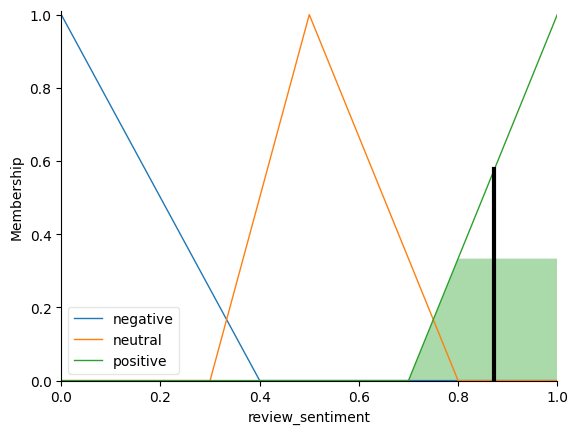

In [ ]:
# Bài 2.9
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Khai báo biến đầu vào
sentiment_score = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'sentiment_score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'emotion_intensity')
positive_words = ctrl.Antecedent(np.arange(0, 11, 1), 'positive_words')
negative_words = ctrl.Antecedent(np.arange(0, 11, 1), 'negative_words')

# Khai báo biến đầu ra
review_sentiment = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'review_sentiment')

# Định nghĩa hàm thành viên cho biến đầu vào
sentiment_score['negative']= fuzz.trimf(sentiment_score.universe, [0, 0, 0.3])
sentiment_score['neutral']= fuzz.trimf(sentiment_score.universe, [0.3, 0.5, 0.7])
sentiment_score['positive']= fuzz.trimf(sentiment_score.universe, [0.7, 1, 1])

emotion_intensity['low']= fuzz.trimf(emotion_intensity.universe, [0, 0, 0.3])
emotion_intensity['medium']= fuzz.trimf(emotion_intensity.universe, [0.3, 0.5, 0.7])
emotion_intensity['high']= fuzz.trimf(emotion_intensity.universe, [0.7, 1, 1])

positive_words['few']= fuzz.trimf(positive_words.universe, [0, 0, 3])
positive_words['some']= fuzz.trimf(positive_words.universe, [2, 4, 6])
positive_words['many']= fuzz.trimf(positive_words.universe, [5, 7.5, 10])

negative_words['few']= fuzz.trimf(negative_words.universe, [0, 0, 2])
negative_words['some']= fuzz.trimf(negative_words.universe, [1, 3, 5])
negative_words['many']= fuzz.trimf(negative_words.universe, [5, 8, 10])

# Định nghĩa hàm thành viên cho biến đầu ra
review_sentiment['negative']= fuzz.trimf(review_sentiment.universe, [0, 0, 0.4])
review_sentiment['neutral']= fuzz.trimf(review_sentiment.universe, [0.3, 0.5, 0.8])
review_sentiment['positive']= fuzz.trimf(review_sentiment.universe, [0.7, 1, 1])

# Định nghĩa các luật mờ
rules= [
    ctrl.Rule(sentiment_score['negative'] & emotion_intensity['high'], review_sentiment['negative']),
    ctrl.Rule(sentiment_score['negative'] & emotion_intensity['low'], review_sentiment['neutral']),
    ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'], review_sentiment['neutral']),
    ctrl.Rule(sentiment_score['positive'] & emotion_intensity['high'], review_sentiment['positive']),
    ctrl.Rule(positive_words['many'] & negative_words['few'], review_sentiment['positive']),
    ctrl.Rule(positive_words['few'] & negative_words['many'], review_sentiment['negative']),
    ctrl.Rule(positive_words['some'] & negative_words['some'], review_sentiment['neutral']),
    ctrl.Rule(sentiment_score['negative'] & negative_words['many'] & emotion_intensity['high'], review_sentiment['negative']),
    ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'] & positive_words['some'], review_sentiment['neutral']),
    ctrl.Rule(sentiment_score['positive'] & positive_words['many'] & emotion_intensity['high'], review_sentiment['positive'])
]


# Tạo hệ thống điều khiển
review_ctrl = ctrl.ControlSystem(rules)
review_sim = ctrl.ControlSystemSimulation(review_ctrl)

# Nhập giá trị đầu vào
review_sim.input['sentiment_score'] = 0.9  # Điểm cảm xúc cao
review_sim.input['emotion_intensity'] = 0.8  # Cường độ cảm xúc cao
review_sim.input['positive_words'] = 7  # Số lượng từ tích cực nhiều
review_sim.input['negative_words'] = 3  # Số lượng từ tiêu cực ít

# Tính toán đầu ra
review_sim.compute()

# In kết quả
print(f"Review Sentiment: {review_sim.output['review_sentiment']:.2f}")
if review_sim.output['review_sentiment'] < 0.3:
    print("Review Sentiment: Negative")
elif review_sim.output['review_sentiment'] < 0.7:
    print("Review Sentiment: Neutral")
else:
    print("Review Sentiment: Positive")

# Vẽ đồ thị
review_sentiment.view(sim=review_sim)



Delivery Time: 19.090909090909108
Incentive: 30.0
Rating: 3.6933443811790054


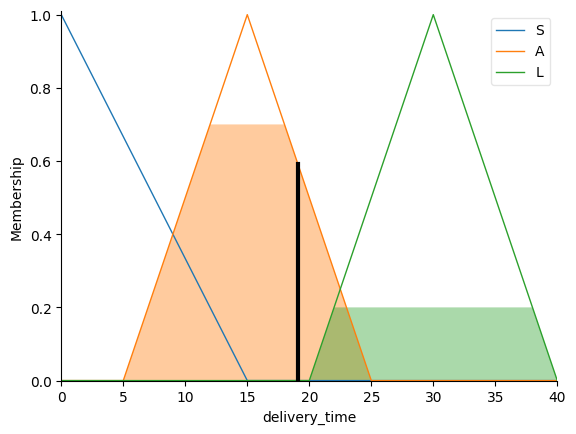

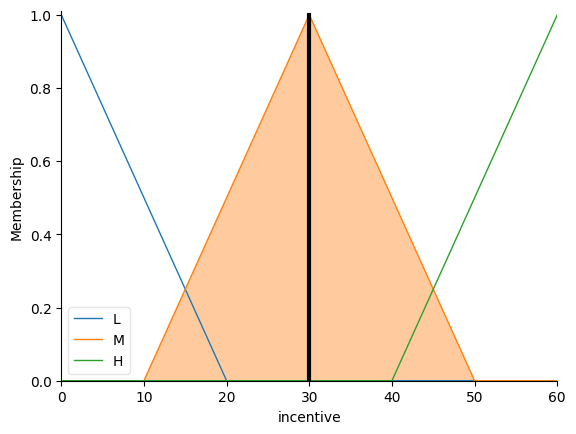

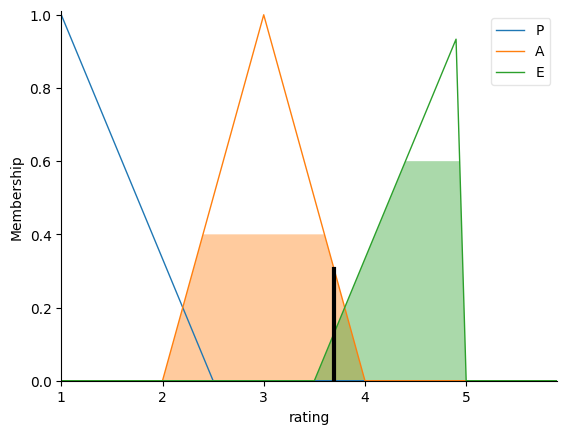

In [ ]:
# Bài 2.10
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
traffic = ctrl.Antecedent(np.arange(0, 11, 1), 'traffic')
distance = ctrl.Antecedent(np.arange(0, 16, 1), 'distance')
weather = ctrl.Antecedent(np.arange(0, 3, 1), 'weather')
prep_time = ctrl.Antecedent(np.arange(0, 26, 1), 'prep_time')
fatigue = ctrl.Antecedent(np.arange(0, 11, 1), 'fatigue')

delivery_time = ctrl.Consequent(np.arange(0, 41, 1), 'delivery_time')
incentive = ctrl.Consequent(np.arange(0, 61, 1), 'incentive')
rating = ctrl.Consequent(np.arange(1, 6, 0.1), 'rating')

traffic['low'] = fuzz.trimf(traffic.universe, [0, 0, 5])
traffic['medium'] = fuzz.trimf(traffic.universe, [0, 5, 10])
traffic['high'] = fuzz.trimf(traffic.universe, [5, 10, 10])

distance['short'] = fuzz.trimf(distance.universe, [0, 0, 3])
distance['medium'] = fuzz.trimf(distance.universe, [3, 5.5, 8])
distance['long'] = fuzz.trimf(distance.universe, [5.5, 16, 16])

weather['clear'] = fuzz.trimf(weather.universe, [0, 0, 1])
weather['rainy'] = fuzz.trimf(weather.universe, [0, 1, 2])
weather['stormy'] = fuzz.trimf(weather.universe, [1, 2, 2])

prep_time['fast'] = fuzz.trimf(prep_time.universe, [0, 0, 10])
prep_time['medium'] = fuzz.trimf(prep_time.universe, [0, 10, 20])
prep_time['slow'] = fuzz.trimf(prep_time.universe, [15, 25, 25])

fatigue['low'] = fuzz.trimf(fatigue.universe, [0, 0, 5])
fatigue['medium'] = fuzz.trimf(fatigue.universe, [0, 5, 10])
fatigue['high'] = fuzz.trimf(fatigue.universe, [5, 10, 10])

delivery_time['S'] = fuzz.trimf(delivery_time.universe, [0, 0, 15])
delivery_time['A'] = fuzz.trimf(delivery_time.universe, [5, 15, 25])
delivery_time['L'] = fuzz.trimf(delivery_time.universe, [20, 30, 40])

incentive['L'] = fuzz.trimf(incentive.universe, [0, 0, 20])
incentive['M'] = fuzz.trimf(incentive.universe, [10, 30, 50])
incentive['H'] = fuzz.trimf(incentive.universe, [40, 60, 60])

rating['P'] = fuzz.trimf(rating.universe, [1, 1, 2.5])
rating['A'] = fuzz.trimf(rating.universe, [2, 3, 4])
rating['E'] = fuzz.trimf(rating.universe, [3.5, 5, 5])

rule1 = ctrl.Rule(traffic['low'] & distance['short'], delivery_time['S'])
rule2 = ctrl.Rule(traffic['medium'] & distance['medium'], delivery_time['A'])
rule3 = ctrl.Rule(traffic['high'] & distance['long'], delivery_time['L'])

rule4 = ctrl.Rule(weather['clear'], incentive['L'])
rule5 = ctrl.Rule(weather['rainy'], incentive['M'])
rule6 = ctrl.Rule(weather['stormy'], incentive['H'])

rule7 = ctrl.Rule(prep_time['fast'] & traffic['low'], delivery_time['S'])
rule8 = ctrl.Rule(prep_time['medium'] & traffic['medium'], delivery_time['A'])
rule9 = ctrl.Rule(prep_time['slow'] & traffic['high'], delivery_time['L'])

rule10 = ctrl.Rule(fatigue['low'], rating['P'])
rule11 = ctrl.Rule(fatigue['medium'], rating['A'])
rule12 = ctrl.Rule(fatigue['high'], rating['E'])

rule13 = ctrl.Rule(distance['long'] & weather['stormy'] & traffic['high'], delivery_time['L'], incentive['H'])
rule14 = ctrl.Rule(distance['short'] & weather['clear'] & traffic['low'], delivery_time['S'], incentive['L'])
rule15 = ctrl.Rule(fatigue['high'] & traffic['high'], delivery_time['L'], rating['E'])

# Tạo hệ thống điều khiển

delivery_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
delivery_sim = ctrl.ControlSystemSimulation(delivery_ctrl)
delivery_sim.input['traffic'] = 6
delivery_sim.input['distance'] = 4
delivery_sim.input['weather'] = 1
delivery_sim.input['prep_time'] = 7
delivery_sim.input['fatigue'] = 8
delivery_sim.compute()
print(f"Delivery Time: {delivery_sim.output['delivery_time']}")
print(f"Incentive: {delivery_sim.output['incentive']}")
print(f"Rating: {delivery_sim.output['rating']}")
delivery_time.view(sim=delivery_sim)
incentive.view(sim=delivery_sim)
rating.view(sim=delivery_sim)





Giá cuối cùng đề xuất: 6.79
Giá đề xuất: High


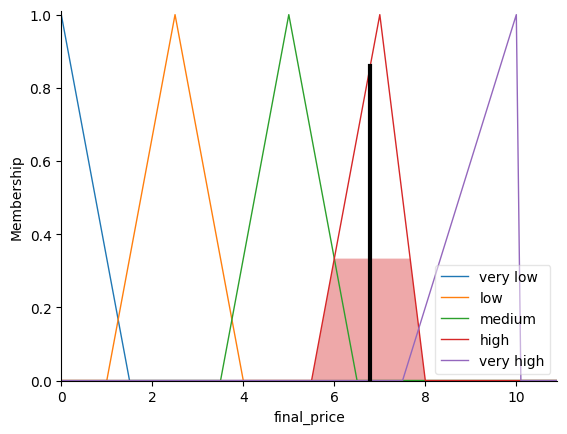

In [ ]:
# Bài 2.11
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Khai báo biến đầu vào
market_demand = ctrl.Antecedent(np.arange(0, 11, 1), 'market_demand')
competitor_pricing = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_pricing')
production_cost = ctrl.Antecedent(np.arange(0, 11, 1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonality')
inventory_level = ctrl.Antecedent(np.arange(0, 11, 1), 'inventory_level')

# Khai báo biến đầu ra
final_price = ctrl.Consequent(np.arange(0, 11, 0.1), 'final_price')

# Định nghĩa hàm thành viên cho biến đầu vào
market_demand['low'] = fuzz.trimf(market_demand.universe, [0, 0, 3])
market_demand['medium'] = fuzz.trimf(market_demand.universe, [2, 5, 8])
market_demand['high'] = fuzz.trimf(market_demand.universe, [7, 10, 10])

competitor_pricing['very low'] = fuzz.trimf(competitor_pricing.universe, [0, 0, 1])
competitor_pricing['low'] = fuzz.trimf(competitor_pricing.universe, [0.5, 1, 2])
competitor_pricing['medium'] = fuzz.trimf(competitor_pricing.universe, [2, 4, 6])
competitor_pricing['high'] = fuzz.trimf(competitor_pricing.universe, [6, 10, 10])

production_cost['low'] = fuzz.trimf(production_cost.universe, [0, 0, 3])
production_cost['medium'] = fuzz.trimf(production_cost.universe, [3, 5, 7])
production_cost['high'] = fuzz.trimf(production_cost.universe, [7, 10, 10])

seasonality['low'] = fuzz.trimf(seasonality.universe, [0, 0, 4])
seasonality['medium'] = fuzz.trimf(seasonality.universe, [3, 5, 7])
seasonality['high'] = fuzz.trimf(seasonality.universe, [6.5, 10, 10])

inventory_level['low'] = fuzz.trimf(inventory_level.universe, [0, 0, 2])
inventory_level['medium'] = fuzz.trimf(inventory_level.universe, [2, 5, 8])
inventory_level['high'] = fuzz.trimf(inventory_level.universe, [7, 8, 9])
inventory_level['very high'] = fuzz.trimf(inventory_level.universe, [8, 10, 10])

# Định nghĩa hàm thành viên cho biến đầu ra
final_price['very low'] = fuzz.trimf(final_price.universe, [0, 0, 1.5])
final_price['low'] = fuzz.trimf(final_price.universe, [1, 2.5, 4])
final_price['medium'] = fuzz.trimf(final_price.universe, [3.5, 5, 6.5])
final_price['high'] = fuzz.trimf(final_price.universe, [5.5, 7, 8])
final_price['very high'] = fuzz.trimf(final_price.universe, [7.5, 10, 10])

# Xây dựng tập luật mờ
rules = [
    ctrl.Rule(market_demand['high'] & competitor_pricing['high'] & inventory_level['low'], final_price['very high']),
    ctrl.Rule(market_demand['high'] & seasonality['high'] & inventory_level['low'], final_price['very high']),
    ctrl.Rule(market_demand['medium'] & production_cost['high'] & inventory_level['low'], final_price['very high']),
    ctrl.Rule(market_demand['high'] & competitor_pricing['medium'] & inventory_level['medium'], final_price['high']),
    ctrl.Rule(market_demand['medium'] & competitor_pricing['high'] & inventory_level['low'], final_price['high']),
    ctrl.Rule(market_demand['medium'] & seasonality['high'] & inventory_level['medium'], final_price['high']),
    ctrl.Rule(market_demand['medium'] & competitor_pricing['medium'] & inventory_level['medium'], final_price['medium']),
    ctrl.Rule(market_demand['medium'] & competitor_pricing['high'] & inventory_level['medium'], final_price['medium']),
    ctrl.Rule(market_demand['low'] & competitor_pricing['high'] & inventory_level['medium'], final_price['medium']),
    ctrl.Rule(market_demand['medium'] & production_cost['medium'] & inventory_level['medium'], final_price['medium']),
    ctrl.Rule(market_demand['low'] & competitor_pricing['low'] & inventory_level['high'], final_price['low']),
    ctrl.Rule(market_demand['medium'] & production_cost['medium'] & inventory_level['high'], final_price['low']),
    ctrl.Rule(market_demand['low'] & seasonality['low'] & inventory_level['high'], final_price['low']),
    ctrl.Rule(market_demand['low'] & competitor_pricing['low'] & inventory_level['very high'], final_price['very low']),
    ctrl.Rule(market_demand['low'] & seasonality['low'] & inventory_level['very high'], final_price['very low']),
    ctrl.Rule(market_demand['medium'] & competitor_pricing['very low'] & inventory_level['very high'], final_price['very low']),
]

# Tạo hệ thống điều khiển mờ
pricing_ctrl = ctrl.ControlSystem(rules)
pricing_simulation = ctrl.ControlSystemSimulation(pricing_ctrl)

# Nhập giá trị đầu vào để thử nghiệm hệ thống
pricing_simulation.input['market_demand'] = 6  # Cầu thị trường: Trung bình
pricing_simulation.input['competitor_pricing'] = 6  # Giá đối thủ: Trung bình
pricing_simulation.input['production_cost'] = 3  # Chi phí sản xuất: Thấp
pricing_simulation.input['seasonality'] = 8  # Mùa vụ: Cao điểm
pricing_simulation.input['inventory_level'] = 3  # Mức tồn kho: Thấp

# Tính toán đầu ra
pricing_simulation.compute()

# In kết quả đầu ra
print(f"Giá cuối cùng đề xuất: {pricing_simulation.output['final_price']:.2f}")
if pricing_simulation.output['final_price'] < 1.5:
    print("Giá đề xuất: Very Low")
elif pricing_simulation.output['final_price'] < 4:
    print("Giá đề xuất: Low")
elif pricing_simulation.output['final_price'] < 6.5:
    print("Giá đề xuất: Medium")
elif pricing_simulation.output['final_price'] < 8:
    print("Giá đề xuất: High")
else:
    print("Giá đề xuất: Very High")

final_price.view(sim=pricing_simulation)


Ride Price: 86.79
Customer Bonus: 6.51
Ride Price: Very High
Customer Bonus: None


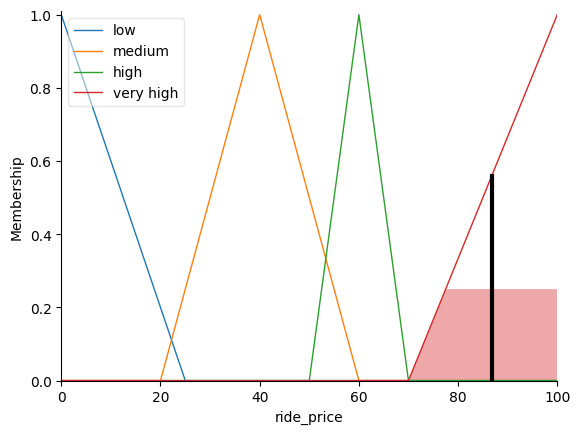

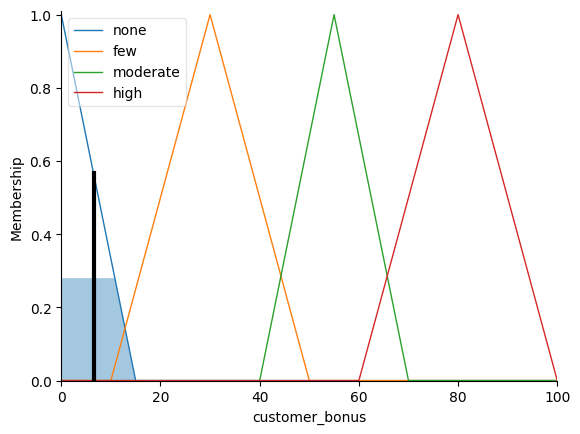

In [ ]:
# Grab 1
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Khai báo biến đầu vào
ride_distance = ctrl.Antecedent(np.arange(0, 56, 1), 'ride_distance')
traffic_condition = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_condition')
demand_level = ctrl.Antecedent(np.arange(0, 101, 1), 'demand_level')
weather_conditions = ctrl.Antecedent(np.arange(0, 11, 1), 'weather_conditions')
customer_rating = ctrl.Antecedent(np.arange(1, 5.1, 0.1), 'customer_rating')
ride_punctuality = ctrl.Antecedent(np.arange(0, 101, 1), 'ride_punctuality')

# Khai báo biến đầu ra
ride_price = ctrl.Consequent(np.arange(0, 101, 1), 'ride_price')
customer_bonus = ctrl.Consequent(np.arange(0, 101, 1), 'customer_bonus')

# Định nghĩa hàm thành viên cho biến đầu vào
ride_distance['short'] = fuzz.trimf(ride_distance.universe, [0, 0, 3])
ride_distance['medium'] = fuzz.trimf(ride_distance.universe, [2, 5, 8])
ride_distance['long'] = fuzz.trimf(ride_distance.universe, [6, 13, 20])
ride_distance['very long'] = fuzz.trimf(ride_distance.universe, [15, 55, 55])

traffic_condition['low'] = fuzz.trimf(traffic_condition.universe, [0, 0, 30])
traffic_condition['medium'] = fuzz.trimf(traffic_condition.universe, [20, 50, 70])
traffic_condition['high'] = fuzz.trimf(traffic_condition.universe, [60, 100, 100])

demand_level['low'] = fuzz.trimf(demand_level.universe, [0, 0, 30])
demand_level['medium'] = fuzz.trimf(demand_level.universe, [20, 50, 70])
demand_level['high'] = fuzz.trimf(demand_level.universe, [60, 100, 100])

weather_conditions['good'] = fuzz.trimf(weather_conditions.universe, [0, 0, 4])
weather_conditions['moderate'] = fuzz.trimf(weather_conditions.universe, [3, 5, 7])
weather_conditions['bad'] = fuzz.trimf(weather_conditions.universe, [6, 10, 10])

customer_rating['poor'] = fuzz.trimf(customer_rating.universe, [1, 1, 2.5])
customer_rating['average'] = fuzz.trimf(customer_rating.universe, [2, 3, 4])
customer_rating['good'] = fuzz.trimf(customer_rating.universe, [3.5, 5, 5])

ride_punctuality['late'] = fuzz.trimf(ride_punctuality.universe, [0, 0, 50])
ride_punctuality['on time'] = fuzz.trimf(ride_punctuality.universe, [40, 60, 80])
ride_punctuality['early'] = fuzz.trimf(ride_punctuality.universe, [70, 100, 100])

# Định nghĩa hàm thành viên cho biến đầu ra
ride_price['low'] = fuzz.trimf(ride_price.universe, [0, 0, 25])
ride_price['medium'] = fuzz.trimf(ride_price.universe, [20, 40, 60])
ride_price['high'] = fuzz.trimf(ride_price.universe, [50, 60, 70])
ride_price['very high'] = fuzz.trimf(ride_price.universe, [70, 100, 100])

customer_bonus['none'] = fuzz.trimf(customer_bonus.universe, [0, 0, 15])
customer_bonus['few'] = fuzz.trimf(customer_bonus.universe, [10, 30, 50])
customer_bonus['moderate'] = fuzz.trimf(customer_bonus.universe, [40, 55, 70])
customer_bonus['high'] = fuzz.trimf(customer_bonus.universe, [60, 80, 100])

# Xây dựng tập luật mờ
rules = [
    ctrl.Rule(ride_distance['short'] & traffic_condition['low'] & demand_level['low'], ride_price['low']),
    ctrl.Rule(ride_distance['short'] & traffic_condition['medium'] & demand_level['high'], ride_price['medium']),
    ctrl.Rule(ride_distance['medium'] & traffic_condition['high'] & demand_level['high'], ride_price['high']),
    ctrl.Rule(ride_distance['long'] & traffic_condition['medium'] & weather_conditions['good'], ride_price['medium']),
    ctrl.Rule(ride_distance['long'] & traffic_condition['high'] & weather_conditions['bad'], ride_price['very high']),
    ctrl.Rule(ride_distance['very long'] & traffic_condition['high'] & demand_level['high'], ride_price['very high']),
    ctrl.Rule(ride_distance['medium'] & traffic_condition['low'] & demand_level['low'], ride_price['medium']),
    ctrl.Rule(ride_distance['short'] & traffic_condition['high'] & weather_conditions['bad'], ride_price['high']),
    ctrl.Rule(ride_distance['very long'] & weather_conditions['bad'], ride_price['very high']),
    ctrl.Rule(ride_distance['medium'] & traffic_condition['medium'] & weather_conditions['moderate'], ride_price['medium']),
    ctrl.Rule(customer_rating['good'] & ride_punctuality['early'], customer_bonus['high']),
    ctrl.Rule(customer_rating['average'] & ride_punctuality['on time'], customer_bonus['moderate']),
    ctrl.Rule(customer_rating['poor'] & ride_punctuality['late'], customer_bonus['none']),
    ctrl.Rule(ride_distance['long'] & traffic_condition['high'] & ride_punctuality['on time'], customer_bonus['high']),
    ctrl.Rule(ride_distance['medium'] & traffic_condition['medium'] & customer_rating['good'], customer_bonus['moderate']),
    ctrl.Rule(customer_rating['poor'] & ride_punctuality['late'], customer_bonus['none']),
    ctrl.Rule(ride_distance['very long'] & weather_conditions['bad'] & customer_rating['good'], customer_bonus['high']),
    ctrl.Rule(ride_distance['short'] & customer_rating['average'] & ride_punctuality['on time'], customer_bonus['few']),
    ctrl.Rule(ride_distance['long'] & traffic_condition['high'] & ride_punctuality['late'], customer_bonus['few']),
    ctrl.Rule(ride_distance['medium'] & weather_conditions['moderate'] & customer_rating['good'], customer_bonus['moderate']),
]

# Tạo hệ thống điều khiển
ride_ctrl = ctrl.ControlSystem(rules)
ride_sim = ctrl.ControlSystemSimulation(ride_ctrl)

# Nhập giá trị thực tế
ride_sim.input['ride_distance'] = 36
ride_sim.input['traffic_condition'] = 10
ride_sim.input['demand_level'] = 36
ride_sim.input['weather_conditions'] = 7
ride_sim.input['customer_rating'] = 2
ride_sim.input['ride_punctuality'] = 36

# Tính toán đầu ra
ride_sim.compute()

# In kết quả
print(f"Ride Price: {ride_sim.output['ride_price']:.2f}")
print(f"Customer Bonus: {ride_sim.output['customer_bonus']:.2f}")
if ride_sim.output['ride_price'] < 25:
    print("Ride Price: Low")
elif ride_sim.output['ride_price'] < 60:
    print("Ride Price: Medium")
elif ride_sim.output['ride_price'] < 70:
    print("Ride Price: High")
else:
    print("Ride Price: Very High")
if ride_sim.output['customer_bonus'] < 15:
    print("Customer Bonus: None")
elif ride_sim.output['customer_bonus'] < 50:
    print("Customer Bonus: Few")
else:
    print("Customer Bonus: High")

ride_price.view(sim=ride_sim)
customer_bonus.view(sim=ride_sim)


Recommended Discount: 55.00%
Recommended Discount: Very High


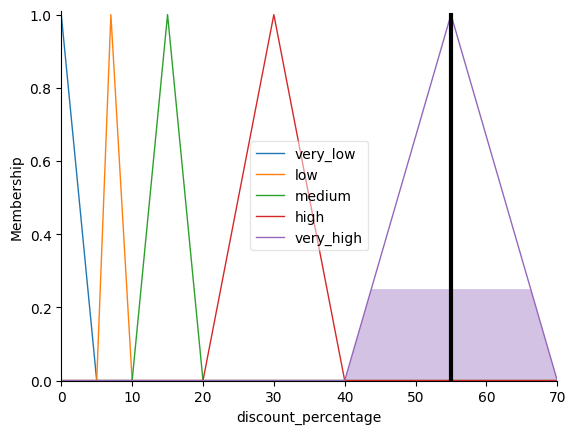

In [7]:
# Grab 2
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Khai báo biến đầu vào
store_rating = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'store_rating')
sales_volume = ctrl.Antecedent(np.arange(0, 101, 1), 'sales_volume')
profit_margin = ctrl.Antecedent(np.arange(0, 101, 1), 'profit_margin')
seasonal_event = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonal_event')
competitor_discounts = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_discounts')

# Khai báo biến đầu ra
discount_percentage = ctrl.Consequent(np.arange(0, 71, 1), 'discount_percentage')

# Định nghĩa hàm thành viên cho biến đầu vào
store_rating['low'] = fuzz.trimf(store_rating.universe, [0, 2, 4])
store_rating['medium'] = fuzz.trimf(store_rating.universe, [3, 4, 4.5])
store_rating['high'] = fuzz.trimf(store_rating.universe, [4.5, 5, 5])

sales_volume['low'] = fuzz.trimf(sales_volume.universe, [0, 0, 30])
sales_volume['medium'] = fuzz.trimf(sales_volume.universe, [20, 50, 80])
sales_volume['high'] = fuzz.trimf(sales_volume.universe, [70, 100, 100])

profit_margin['low'] = fuzz.trimf(profit_margin.universe, [0, 0, 25])
profit_margin['medium'] = fuzz.trimf(profit_margin.universe, [20, 45, 70])
profit_margin['high'] = fuzz.trimf(profit_margin.universe, [65, 100, 100])

seasonal_event['none'] = fuzz.trimf(seasonal_event.universe, [0, 0, 3])
seasonal_event['medium'] = fuzz.trimf(seasonal_event.universe, [2, 4, 6])
seasonal_event['high'] = fuzz.trimf(seasonal_event.universe, [6, 10, 10])

competitor_discounts['low'] = fuzz.trimf(competitor_discounts.universe, [0, 0, 2])
competitor_discounts['medium'] = fuzz.trimf(competitor_discounts.universe, [2, 4, 6])
competitor_discounts['high'] = fuzz.trimf(competitor_discounts.universe, [6, 10, 10])

# Định nghĩa hàm thành viên cho biến đầu ra
discount_percentage['very_low'] = fuzz.trimf(discount_percentage.universe, [0, 0, 5])
discount_percentage['low'] = fuzz.trimf(discount_percentage.universe, [5, 7, 10])
discount_percentage['medium'] = fuzz.trimf(discount_percentage.universe, [10, 15, 20])
discount_percentage['high'] = fuzz.trimf(discount_percentage.universe, [20, 30, 40])
discount_percentage['very_high'] = fuzz.trimf(discount_percentage.universe, [40, 55, 70])

# Xây dựng tập luật mờ
rules = [
    ctrl.Rule(store_rating['high'] & sales_volume['high'] & profit_margin['high'], discount_percentage['very_low']),
    ctrl.Rule(store_rating['low'] & sales_volume['low'] & profit_margin['high'], discount_percentage['high']),
    ctrl.Rule(seasonal_event['high'] & competitor_discounts['high'], discount_percentage['very_high']),
    ctrl.Rule(store_rating['medium'] & sales_volume['medium'] & profit_margin['medium'], discount_percentage['medium']),
    ctrl.Rule(competitor_discounts['low'] & profit_margin['low'] & sales_volume['high'], discount_percentage['very_low']),
    ctrl.Rule(store_rating['low'] & seasonal_event['none'], discount_percentage['medium']),
    ctrl.Rule(sales_volume['low'] & profit_margin['low'], discount_percentage['very_high']),
]

# Tạo hệ thống điều khiển
discount_ctrl = ctrl.ControlSystem(rules)
discount_sim = ctrl.ControlSystemSimulation(discount_ctrl)

# Nhập giá trị đầu vào
discount_sim.input['store_rating'] = 4.3
discount_sim.input['sales_volume'] = 30
discount_sim.input['profit_margin'] = 20
discount_sim.input['seasonal_event'] = 7
discount_sim.input['competitor_discounts'] = 9

# Tính toán đầu ra
discount_sim.compute()

# In kết quả
print(f"Recommended Discount: {discount_sim.output['discount_percentage']:.2f}%")
if discount_sim.output['discount_percentage'] < 5:
    print("Recommended Discount: Very Low")
elif discount_sim.output['discount_percentage'] < 10:
    print("Recommended Discount: Low")
elif discount_sim.output['discount_percentage'] < 25:
    print("Recommended Discount: Medium")
elif discount_sim.output['discount_percentage'] < 40:
    print("Recommended Discount: High")
else:
    print("Recommended Discount: Very High")

# Vẽ đồ thị
discount_percentage.view(sim=discount_sim)

Recommended Discount: 15.00%
Recommended Discount: Medium


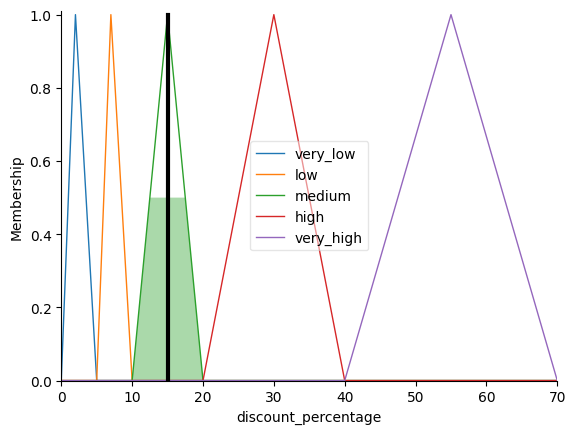

In [ ]:
# Grab 3
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Khai báo biến đầu vào
product_demand = ctrl.Antecedent(np.arange(0, 11, 1), 'product_demand')  # (0: Thấp, 10: Cao)
competitor_pricing = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_pricing')  # (0: Thấp, 10: Cao)
store_reputation = ctrl.Antecedent(np.arange(3, 5, 0.1), 'store_reputation')  # (0: Thấp, 10: Cao)
profit_margin = ctrl.Antecedent(np.arange(0, 11, 1), 'profit_margin')  # (0: Thấp, 10: Cao)
seasonal_demand = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonal_demand')  # (0: Không có, 10: Cao)

# Khai báo biến đầu ra
discount_percentage = ctrl.Consequent(np.arange(0, 71, 1), 'discount_percentage')  # (0% - 70%)

# Định nghĩa hàm thành viên cho biến đầu vào
product_demand['low'] = fuzz.trimf(product_demand.universe, [0, 0, 3])
product_demand['medium'] = fuzz.trimf(product_demand.universe, [2, 5, 8])
product_demand['high'] = fuzz.trimf(product_demand.universe, [7, 10, 10])

competitor_pricing['low'] = fuzz.trimf(competitor_pricing.universe, [0, 0, 2])
competitor_pricing['medium'] = fuzz.trimf(competitor_pricing.universe, [1, 4, 7])
competitor_pricing['high'] = fuzz.trimf(competitor_pricing.universe, [6, 10, 10])

store_reputation['low'] = fuzz.trimf(store_reputation.universe, [3, 3.5, 4])
store_reputation['medium'] = fuzz.trimf(store_reputation.universe, [4, 4.25, 4.5])
store_reputation['high'] = fuzz.trimf(store_reputation.universe, [4.5, 5, 5])

profit_margin['low'] = fuzz.trimf(profit_margin.universe, [0, 0, 3])
profit_margin['medium'] = fuzz.trimf(profit_margin.universe, [2, 5, 8])
profit_margin['high'] = fuzz.trimf(profit_margin.universe, [7, 10, 10])

seasonal_demand['none'] = fuzz.trimf(seasonal_demand.universe, [0, 0, 2])
seasonal_demand['medium'] = fuzz.trimf(seasonal_demand.universe, [2, 4, 6])
seasonal_demand['high'] = fuzz.trimf(seasonal_demand.universe, [6, 10, 10])


# Định nghĩa hàm thành viên cho biến đầu ra
discount_percentage['very_low'] = fuzz.trimf(discount_percentage.universe, [0, 2, 5])
discount_percentage['low'] = fuzz.trimf(discount_percentage.universe, [5, 7, 10])
discount_percentage['medium'] = fuzz.trimf(discount_percentage.universe, [10, 15, 20])
discount_percentage['high'] = fuzz.trimf(discount_percentage.universe, [20, 30, 40])
discount_percentage['very_high'] = fuzz.trimf(discount_percentage.universe, [40, 55, 70])

# Xây dựng tập luật mờ
rules = [
    ctrl.Rule(product_demand['high'] & competitor_pricing['low'] & profit_margin['low'], discount_percentage['very_low']),
    ctrl.Rule(product_demand['low'] & competitor_pricing['high'] & profit_margin['high'], discount_percentage['high']),
    ctrl.Rule(store_reputation['high'] & profit_margin['medium'] & seasonal_demand['high'], discount_percentage['medium']),
    ctrl.Rule(competitor_pricing['high'] & seasonal_demand['high'] & profit_margin['high'], discount_percentage['very_high']),
    ctrl.Rule(store_reputation['low'] & product_demand['medium'] & profit_margin['low'], discount_percentage['medium']),
    ctrl.Rule(product_demand['high'] & seasonal_demand['none'] & competitor_pricing['low'], discount_percentage['very_low']),
    ctrl.Rule(profit_margin['high'] & competitor_pricing['medium'] & seasonal_demand['high'], discount_percentage['medium']),
]

# Tạo hệ thống điều khiển
discount_ctrl = ctrl.ControlSystem(rules)
discount_sim = ctrl.ControlSystemSimulation(discount_ctrl)

# Nhập giá trị thực tế
discount_sim.input['product_demand'] = 8
discount_sim.input['competitor_pricing'] = 5
discount_sim.input['store_reputation'] = 4.2
discount_sim.input['profit_margin'] = 9
discount_sim.input['seasonal_demand'] = 8

# Tính toán đầu ra
discount_sim.compute()

# In kết quả
print(f"Recommended Discount: {discount_sim.output['discount_percentage']:.2f}%")
if discount_sim.output['discount_percentage'] < 5:
    print("Recommended Discount: Very Low")
elif discount_sim.output['discount_percentage'] < 10:
    print("Recommended Discount: Low")
elif discount_sim.output['discount_percentage'] < 25:
    print("Recommended Discount: Medium")
elif discount_sim.output['discount_percentage'] < 40:
    print("Recommended Discount: High")
else:
    print("Recommended Discount: Very High")


# Hiển thị kết quả
discount_percentage.view(sim=discount_sim)


Number of Orders to Combine: 8.00
Delivery Priority: 50.00%
Number of Orders to Combine: Many
Delivery Priority: Medium


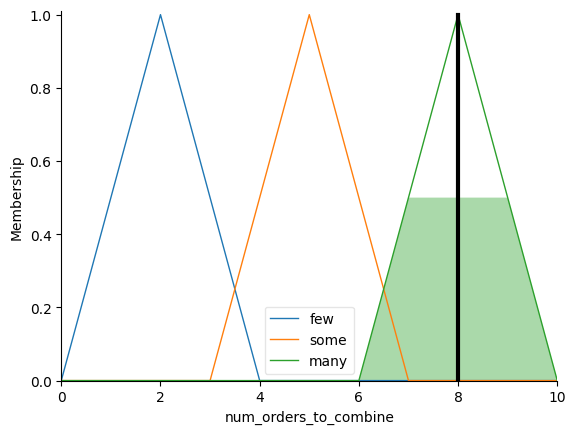

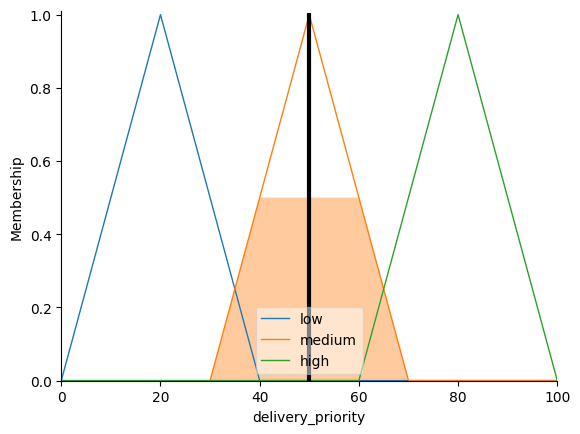

In [ ]:
# Grab 4
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Khai báo các biến đầu vào
order_density = ctrl.Antecedent(np.arange(0, 101, 1), 'order_density')
delivery_urgency = ctrl.Antecedent(np.arange(0, 101, 1), 'delivery_urgency')
driver_load = ctrl.Antecedent(np.arange(0, 101, 1), 'driver_load')
traffic_conditions = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_conditions')
profit_per_delivery = ctrl.Antecedent(np.arange(0, 101, 1), 'profit_per_delivery')

# Khai báo biến đầu ra
num_orders_to_combine = ctrl.Consequent(np.arange(0, 11, 1), 'num_orders_to_combine')
delivery_priority = ctrl.Consequent(np.arange(0, 101, 1), 'delivery_priority')

# Định nghĩa các hàm thành viên cho biến đầu vào
order_density['low'] = fuzz.trimf(order_density.universe, [0, 20, 40])
order_density['medium'] = fuzz.trimf(order_density.universe, [30, 50, 70])
order_density['high'] = fuzz.trimf(order_density.universe, [60, 80, 100])

delivery_urgency['low'] = fuzz.trimf(delivery_urgency.universe, [0, 15, 30])
delivery_urgency['medium'] = fuzz.trimf(delivery_urgency.universe, [30, 50, 70])
delivery_urgency['high'] = fuzz.trimf(delivery_urgency.universe, [70, 100, 100])

driver_load['low'] = fuzz.trimf(driver_load.universe, [0, 20, 40])
driver_load['medium'] = fuzz.trimf(driver_load.universe, [30, 50, 70])
driver_load['high'] = fuzz.trimf(driver_load.universe, [60, 80, 100])

traffic_conditions['low'] = fuzz.trimf(traffic_conditions.universe, [0, 10, 20])
traffic_conditions['medium'] = fuzz.trimf(traffic_conditions.universe, [20, 40, 60])
traffic_conditions['high'] = fuzz.trimf(traffic_conditions.universe, [60, 80, 100])

profit_per_delivery['low'] = fuzz.trimf(profit_per_delivery.universe, [0, 10, 25])
profit_per_delivery['medium'] = fuzz.trimf(profit_per_delivery.universe, [20, 35, 50])
profit_per_delivery['high'] = fuzz.trimf(profit_per_delivery.universe, [50, 75, 100])

# Định nghĩa các hàm thành viên cho biến đầu ra
num_orders_to_combine['few'] = fuzz.trimf(num_orders_to_combine.universe, [0, 2, 4])
num_orders_to_combine['some'] = fuzz.trimf(num_orders_to_combine.universe, [3, 5, 7])
num_orders_to_combine['many'] = fuzz.trimf(num_orders_to_combine.universe, [6, 8, 10])

delivery_priority['low'] = fuzz.trimf(delivery_priority.universe, [0, 20, 40])
delivery_priority['medium'] = fuzz.trimf(delivery_priority.universe, [30, 50, 70])
delivery_priority['high'] = fuzz.trimf(delivery_priority.universe, [60, 80, 100])

# Tạo tập hợp luật mờ
rules = [
    ctrl.Rule(order_density['high'] & driver_load['low'] & traffic_conditions['medium'], num_orders_to_combine['many']),
    ctrl.Rule(order_density['medium'] & traffic_conditions['high'] & delivery_urgency['medium'], num_orders_to_combine['some']),
    ctrl.Rule(driver_load['high'] & order_density['high'] & profit_per_delivery['medium'], num_orders_to_combine['some']),
    ctrl.Rule(order_density['low'] & delivery_urgency['high'] & traffic_conditions['medium'], num_orders_to_combine['some']),
    ctrl.Rule(profit_per_delivery['high'] & delivery_urgency['high'] & traffic_conditions['high'], num_orders_to_combine['some']),
    ctrl.Rule(delivery_urgency['high'] & profit_per_delivery['high'], delivery_priority['high']),
    ctrl.Rule(delivery_urgency['medium'] & traffic_conditions['medium'], delivery_priority['medium']),
    ctrl.Rule(delivery_urgency['low'] & order_density['high'] & profit_per_delivery['low'], delivery_priority['low']),
]

# Tạo hệ thống điều khiển mờ
combine_ctrl = ctrl.ControlSystem(rules)
combine_sim = ctrl.ControlSystemSimulation(combine_ctrl)

# Đặt giá trị đầu vào
combine_sim.input['order_density'] = 80  # Cao
combine_sim.input['delivery_urgency'] = 50  # Trung bình
combine_sim.input['driver_load'] = 20  # Thấp
combine_sim.input['traffic_conditions'] = 50  # Trung bình
combine_sim.input['profit_per_delivery'] = 50  # Trung bình

# Tính toán kết quả
combine_sim.compute()

# In kết quả đầu ra
print(f"Number of Orders to Combine: {combine_sim.output['num_orders_to_combine']:.2f}")
print(f"Delivery Priority: {combine_sim.output['delivery_priority']:.2f}%")
if combine_sim.output['num_orders_to_combine'] < 3:
    print("Number of Orders to Combine: Few")
elif combine_sim.output['num_orders_to_combine'] < 7:
    print("Number of Orders to Combine: Some")
else:
    print("Number of Orders to Combine: Many")
if combine_sim.output['delivery_priority'] < 20:
    print("Delivery Priority: Low")
elif combine_sim.output['delivery_priority'] < 60:
    print("Delivery Priority: Medium")
else:
    print("Delivery Priority: High")

num_orders_to_combine.view(sim=combine_sim)
delivery_priority.view(sim=combine_sim)
